In [12]:
import pandas as pd
from IPython.display import display 
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

data = pd.read_csv('../data/vehicle_price_prediction.csv',sep=',')

In [ ]:
print("""
========================================
🚗 DATASET: Vehicle Price Prediction
========================================
📦 Fonte: Kaggle - https://www.kaggle.com/datasets/metawave/vehicle-price-prediction
📅 Última atualização: 2023
📊 Tamanho aproximado: 5.000 registros
📁 Formato: CSV (vehicle_price_prediction.csv)

📘 DESCRIÇÃO:
O dataset contém informações detalhadas sobre veículos usados e seus respectivos preços,
sendo ideal para análise exploratória e modelagem de previsão de preço.

🔹 Principais colunas:
- make: Marca do veículo (ex: Toyota, BMW, Ford)
- model: Modelo do veículo
- year: Ano de fabricação
- transmission: Tipo de câmbio (manual/automático)
- mileage: Quilometragem percorrida
- fuel_type: Tipo de combustível (gasolina, diesel, híbrido, elétrico)
- engine_size: Tamanho do motor (litros)
- owner_count: Quantidade de donos anteriores
- accident_history: Histórico de acidentes (Major/Minor/N.A)
- price: Preço atual do veículo (em USD)

🎯 OBJETIVO:
Explorar e compreender os fatores que mais influenciam o preço de veículos usados,
permitindo insights valiosos para:
- Avaliação de revendas e concessionárias
- Estimativas de depreciação
- Estratégias de precificação e compra inteligente

""")



🚗 DATASET: Vehicle Price Prediction
📦 Fonte: Kaggle - https://www.kaggle.com/datasets/metawave/vehicle-price-prediction
📅 Última atualização: 2023
📊 Tamanho aproximado: 5.000 registros
📁 Formato: CSV (vehicle_price_prediction.csv)

📘 DESCRIÇÃO:
O dataset contém informações detalhadas sobre veículos usados e seus respectivos preços,
sendo ideal para análise exploratória e modelagem de previsão de preço.

🔹 Principais colunas:
- make: Marca do veículo (ex: Toyota, BMW, Ford)
- model: Modelo do veículo
- year: Ano de fabricação
- transmission: Tipo de câmbio (manual/automático)
- mileage: Quilometragem percorrida
- fuel_type: Tipo de combustível (gasolina, diesel, híbrido, elétrico)
- engine_size: Tamanho do motor (litros)
- owner_count: Quantidade de donos anteriores
- accident_history: Histórico de acidentes (sim/não)
- price: Preço atual do veículo (em USD)

🎯 OBJETIVO:
Explorar e compreender os fatores que mais influenciam o preço de veículos usados,
permitindo insights valiosos para

In [16]:
display(data.head(5))

,make,model,year,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,exterior_color,interior_color,owner_count,accident_history,seller_type,condition,trim,vehicle_age,mileage_per_year,brand_popularity,price
0,Volkswagen,Jetta,2016,183903,173,Manual,Electric,RWD,Sedan,Blue,Brown,5,NaN,Dealer,Excellent,EX,9,20433.67,0.04,7208.52
1,Lexus,RX,2010,236643,352,Manual,Gasoline,FWD,Sedan,Silver,Beige,5,Minor,Dealer,Good,LX,15,15776.20,0.04,6911.81
2,Subaru,Crosstrek,2016,103199,188,Automatic,Diesel,AWD,Sedan,Silver,Beige,5,NaN,Dealer,Excellent,Touring,9,11466.56,0.04,11915.63
3,Cadillac,Lyriq,2016,118889,338,Manual,Gasoline,AWD,SUV,Black,Gray,3,NaN,Private,Good,Base,9,13209.89,0.04,25984.79
4,Toyota,Highlander,2018,204170,196,Manual,Diesel,FWD,Sedan,Red,Brown,5,Minor,Dealer,Excellent,Sport,7,29167.14,0.04,8151.30


In [15]:
print("Removendo as colunas:")
df = data.copy()
df.columns = df.columns.str.strip()
df = df.drop(["seller_type", "brand_popularity"], axis=1)
df.info()

Removendo as colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   make              500000 non-null  object 
 1   model             500000 non-null  object 
 2   year              500000 non-null  int64  
 3   mileage           500000 non-null  int64  
 4   engine_hp         500000 non-null  int64  
 5   transmission      500000 non-null  object 
 6   fuel_type         500000 non-null  object 
 7   drivetrain        500000 non-null  object 
 8   body_type         500000 non-null  object 
 9   exterior_color    500000 non-null  object 
 10  interior_color    500000 non-null  object 
 11  owner_count       500000 non-null  int64  
 12  accident_history  124584 non-null  object 
 13  condition         500000 non-null  object 
 14  trim              500000 non-null  object 
 15  vehicle_age       500000 non-null  int64  
 16

In [17]:
print("Quantidade de linhas e colunas")
print("linhas:", df.shape[0])
print("colunas:", df.shape[1])

Quantidade de linhas e colunas
linhas: 500000
colunas: 18


In [18]:
print('Valores faltantes')
df.isnull().sum()

Valores faltantes


make                     0
model                    0
year                     0
mileage                  0
engine_hp                0
transmission             0
fuel_type                0
drivetrain               0
body_type                0
exterior_color           0
interior_color           0
owner_count              0
accident_history    375416
condition                0
trim                     0
vehicle_age              0
mileage_per_year         0
price                    0
dtype: int64

In [19]:
print("Entendendo valor nulo accident_history")
df['accident_history'].value_counts()

Entendendo valor nulo accident_history


accident_history
Minor    99709
Major    24875
Name: count, dtype: int64

In [ ]:
print("Quantidade de dados faltantes para cada coluna")
df['accident_history'].fillna("N.A", inplace=True)
df.isnull().sum()

Quantidade de dados faltantes para cada coluna


make                0
model               0
year                0
mileage             0
engine_hp           0
transmission        0
fuel_type           0
drivetrain          0
body_type           0
exterior_color      0
interior_color      0
owner_count         0
accident_history    0
condition           0
trim                0
vehicle_age         0
mileage_per_year    0
price               0
dtype: int64

In [ ]:
print("Describe dos dados numéricos:")
df.describe()

Describe dos dados numéricos:


,year,mileage,engine_hp,owner_count,vehicle_age,mileage_per_year,price
count,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00
mean,2017.45,112646.71,235.69,3.48,7.59,14539.98,20337.70
std,3.90,72095.15,93.66,1.54,3.83,6106.91,13650.44
min,2000.00,500.00,90.00,1.00,1.00,34.19,1500.00
25%,2015.00,57663.75,162.00,2.00,5.00,10490.75,10326.15
50%,2018.00,103338.00,215.00,4.00,7.00,14684.50,17874.32
75%,2020.00,157902.25,300.00,5.00,10.00,18690.22,27627.98
max,2025.00,300000.00,576.00,5.00,25.00,51046.00,91259.31


In [ ]:
print("Verificar dados duplicados")
df.loc[df.duplicated()]

Verificar dados duplicados


,make,model,year,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,exterior_color,interior_color,owner_count,accident_history,condition,trim,vehicle_age,mileage_per_year,price


In [ ]:
print("Valores unicos")
df.nunique()

Valores unicos


make                    25
model                  105
year                    26
mileage             213419
engine_hp              470
transmission             2
fuel_type                3
drivetrain               3
body_type                7
exterior_color           6
interior_color           4
owner_count              5
accident_history         3
condition                3
trim                     6
vehicle_age             25
mileage_per_year    323893
price               449654
dtype: int64

year                   Axes(0.125,0.11;0.0945122x0.77)
mileage             Axes(0.238415,0.11;0.0945122x0.77)
engine_hp           Axes(0.351829,0.11;0.0945122x0.77)
owner_count         Axes(0.465244,0.11;0.0945122x0.77)
vehicle_age         Axes(0.578659,0.11;0.0945122x0.77)
mileage_per_year    Axes(0.692073,0.11;0.0945122x0.77)
price               Axes(0.805488,0.11;0.0945122x0.77)
dtype: object

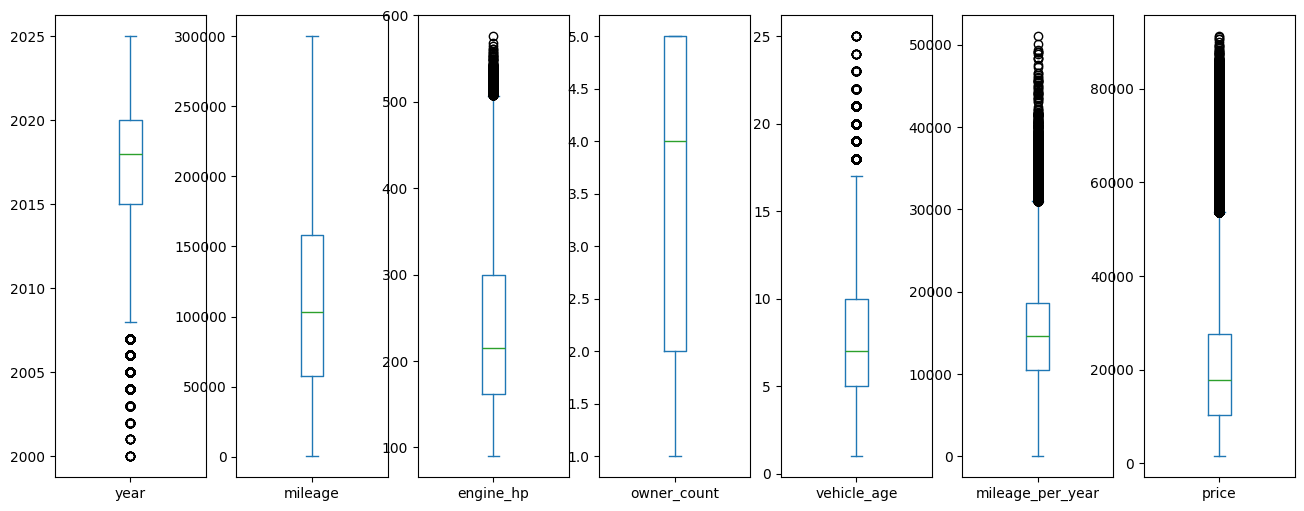

In [20]:
df.plot(kind='box', figsize=(16,6), subplots=True)

In [21]:
display(df[df['price'] >= 90000])

,make,model,year,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,exterior_color,interior_color,owner_count,accident_history,condition,trim,vehicle_age,mileage_per_year,price
203728,Porsche,911,2024,15856,466,Manual,Diesel,FWD,SUV,Blue,Black,4,NaN,Excellent,Limited,1,15856.00,90693.67
329372,Porsche,Cayenne,2025,1615,406,Manual,Gasoline,RWD,SUV,Red,Brown,1,NaN,Excellent,Base,1,1615.00,91259.31
402389,Porsche,Macan,2025,4864,473,Automatic,Electric,RWD,SUV,Black,Gray,1,NaN,Excellent,Sport,1,4864.00,90629.41
454567,Porsche,911,2025,2834,453,Manual,Gasoline,AWD,SUV,Blue,Beige,1,NaN,Excellent,Touring,1,2834.00,91009.40


In [ ]:
print("Dez maiores valores de carro incrementando nas informações a marca, modelo, ano e quantidade de milhas percorridas")
df.loc[:, ['make','model', 'year', 'mileage', 'price']].sort_values(by='price', ascending = False).head(10)

Dez maiores valores de carro incrementando nas informações a marca, modelo, ano e quantidade de milhas percorridas


,make,model,year,mileage,price
329372,Porsche,Cayenne,2025,1615,91259.31
454567,Porsche,911,2025,2834,91009.40
203728,Porsche,911,2024,15856,90693.67
402389,Porsche,Macan,2025,4864,90629.41
139445,Porsche,Cayenne,2024,3123,89961.19
472598,Porsche,911,2024,18209,89395.88
498401,Porsche,Panamera,2023,25172,89309.42
333440,Porsche,Cayenne,2025,1200,89178.64
206547,Porsche,Macan,2024,21033,88840.82
152220,Porsche,Panamera,2025,4205,88743.78


In [22]:
print("Dez menos valores de carro incrementando nas informações a marca, modelo, ano e quantidade de milhas percorridas")
df.loc[:, ['make','model', 'year', 'mileage', 'price']].sort_values(by='price', ascending = True).head(10)

Dez menos valores de carro incrementando nas informações a marca, modelo, ano e quantidade de milhas percorridas


,make,model,year,mileage,price
314073,Chevrolet,Silverado,2011,261300,1500.00
499980,Hyundai,Sonata,2013,184150,1500.00
30,Ford,Explorer,2013,234866,1500.00
253784,Honda,CR-V,2007,300000,1500.00
108302,Toyota,Highlander,2014,264861,1500.00
60,Hyundai,Tucson,2010,173846,1500.00
59,Volkswagen,Tiguan,2010,189574,1500.00
499993,Dodge,Challenger,2007,300000,1500.00
106,Dodge,Challenger,2008,240744,1500.00
108312,Honda,CR-V,2011,192811,1500.00


Quantidade de carros no ano de fabricação


Text(0, 0.5, 'Carros fabricados')

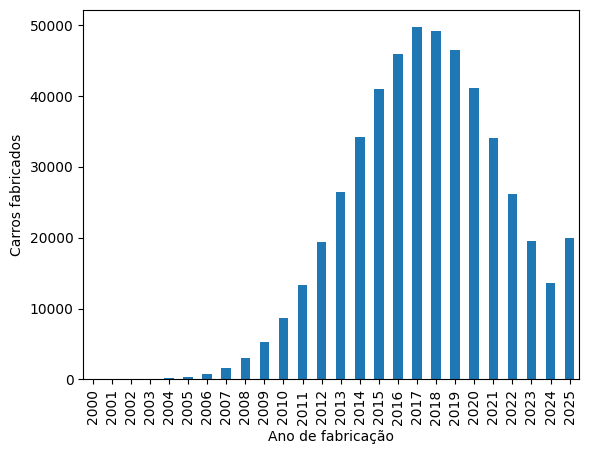

In [23]:
print("Quantidade de carros no ano de fabricação")
ax = df['year'].value_counts().sort_index().plot(kind='bar')

ax.set_xlabel('Ano de fabricação')
ax.set_ylabel('Carros fabricados')

Correlação: Ano <-> Preço (medio)


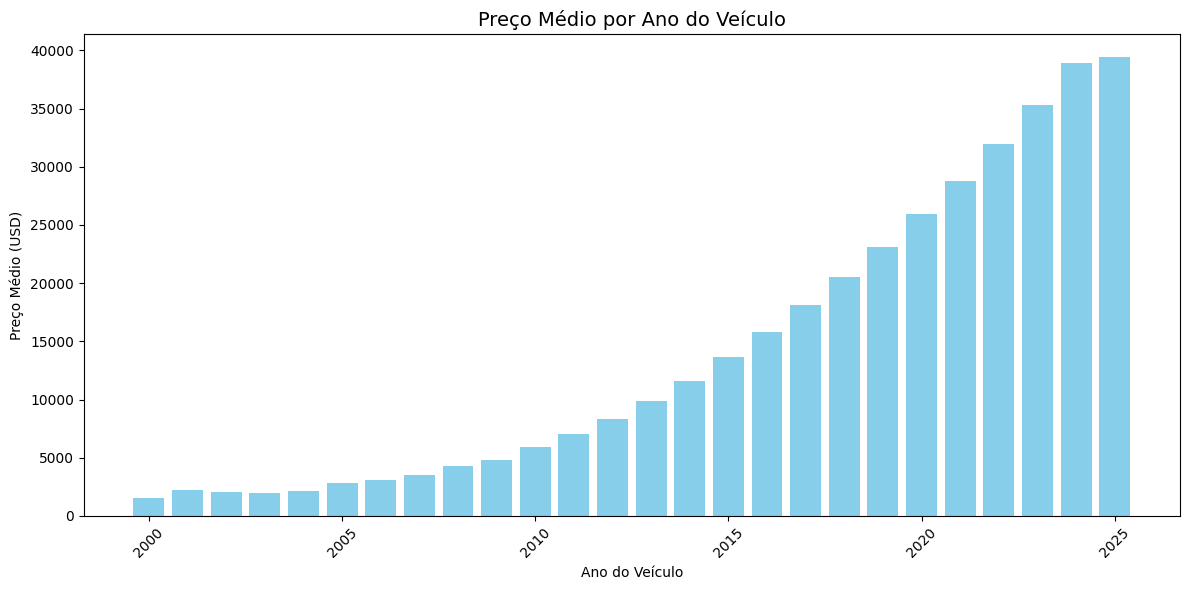

In [24]:
print("Correlação: Ano <-> Preço (medio)")

# Agrupa por ano e calcula a média dos preços
preco_medio_por_ano = df.groupby('year')['price'].mean().sort_index()

# Gráfico de barras
plt.figure(figsize=(12,6))
plt.bar(preco_medio_por_ano.index, preco_medio_por_ano.values, color='skyblue')

plt.title("Preço Médio por Ano do Veículo", fontsize=14)
plt.xlabel("Ano do Veículo")
plt.ylabel("Preço Médio (USD)")
plt.xticks(rotation=45)  # gira os anos para melhor visualização
plt.tight_layout()
plt.show()

Qual o preço medio dos veiculos, em relação a marca, quantidade de donos e preço


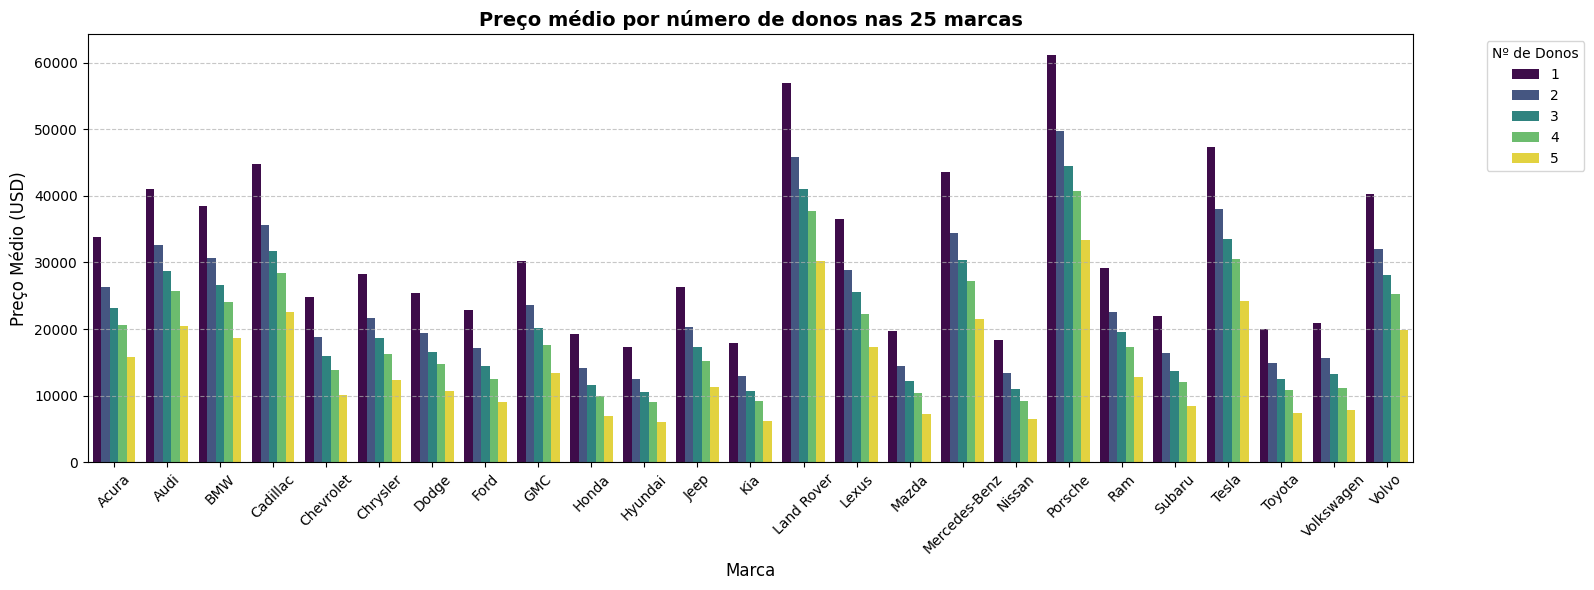

In [ ]:
# =============================================================
# PERGUNTA 1
# =============================================================

print("Qual o preço medio dos veiculos, em relação a marca, quantidade de donos e preço")

# === 2️⃣ Agrupar por marca e número de proprietários ===
brand_owner_avg = (
    df.groupby(["make", "owner_count"])["price"]
    .mean()
    .reset_index()
)

# === 3️⃣ Calcular preço médio geral por marca ===
brand_avg_price = df.groupby("make")["price"].mean().sort_values(ascending=False)

# Selecionar as 25 marcas com maior preço médio
top_brands = brand_avg_price.head(25).index
filtered = brand_owner_avg[brand_owner_avg["make"].isin(top_brands)]
# === 4️⃣ Criar o gráfico ===
plt.figure(figsize=(16,6))
sns.barplot(
    data=filtered,
    x="make", 
    y="price", 
    hue="owner_count", 
    palette="viridis"
)

# === 5️⃣ Personalização visual ===
plt.title("Preço médio por número de donos nas 25 marcas", fontsize=14, weight='bold')
plt.xlabel("Marca", fontsize=12)
plt.ylabel("Preço Médio (USD)", fontsize=12)
plt.legend(title="Nº de Donos", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Como a quilometragem e a idade dos veículos influenciam no preço?


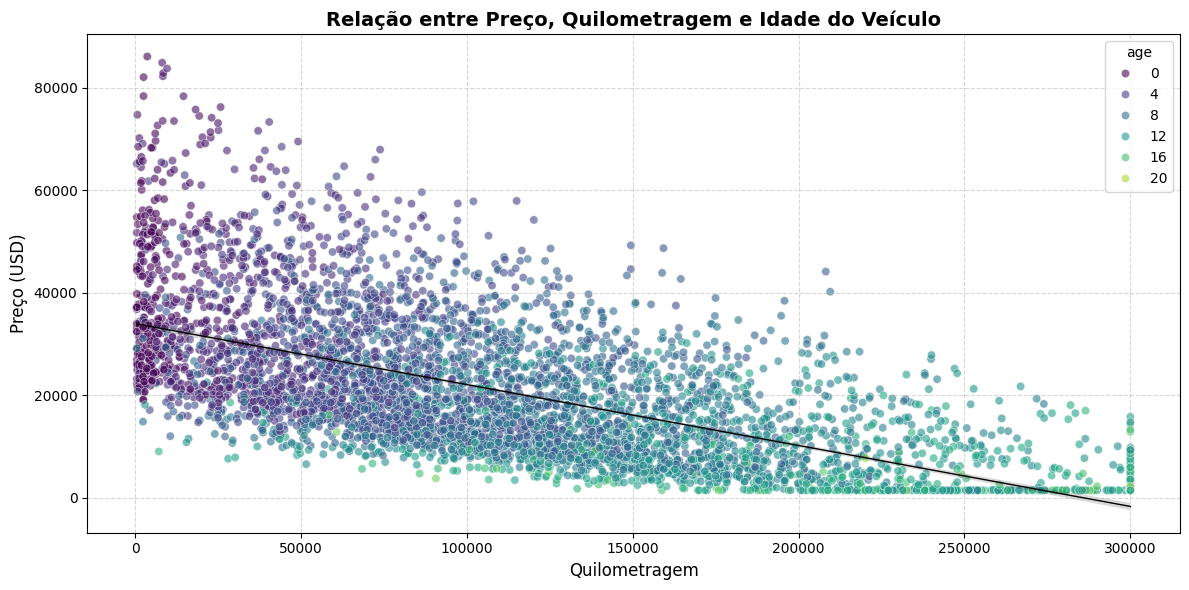

In [34]:
# =============================================================
# PERGUNTA 2
# =============================================================
print("Como a quilometragem e a idade dos veículos influenciam no preço?")

# === 1️⃣ Criar coluna de idade do veículo ===
current_year = 2025
df["age"] = current_year - df["year"]

# === 2️⃣ Amostra para reduzir sobrecarga do gráfico ===
sample_n = min(5000, len(df))
df_sample = df.sample(sample_n, random_state=42)

# === 3️⃣ Criar scatter plot (price x mileage) colorido por idade ===
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_sample,
    x="mileage",
    y="price",
    hue="age",
    palette="viridis",
    alpha=0.6
)

# Linha de tendência
sns.regplot(
    data=df_sample,
    x="mileage",
    y="price",
    scatter=False,
    color="black",
    line_kws={"linewidth": 1}
)

plt.title("Relação entre Preço, Quilometragem e Idade do Veículo", fontsize=14, weight='bold')
plt.xlabel("Quilometragem", fontsize=12)
plt.ylabel("Preço (USD)", fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Qual o impacto do histórico de acidentes no preço dos veículos?


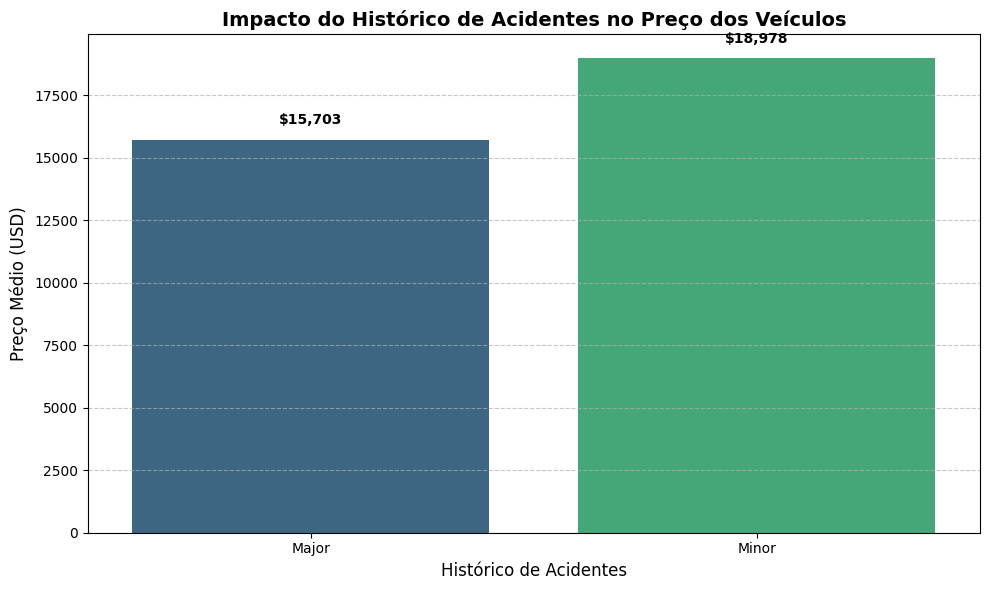


📊 Estatísticas Detalhadas por Histórico de Acidentes:
                  count  preco_medio  preco_mediano  desvio_padrao  \
accident_history                                                     
Major             24875     15703.24       13772.22       10503.85   
Minor             99709     18978.24       16702.73       12636.09   

                  preco_minimo  preco_maximo  
accident_history                              
Major                  1500.00      64976.43  
Minor                  1500.00      81585.82  


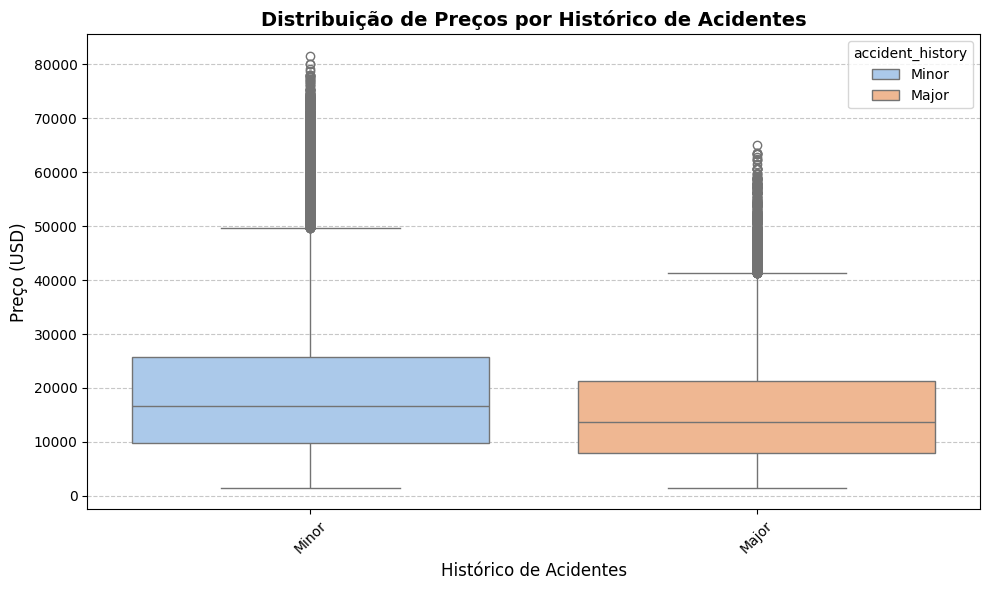

In [50]:
# =============================================================
# PERGUNTA 3
# =============================================================
print("Qual o impacto do histórico de acidentes no preço dos veículos?")

# === 1️⃣ Calcular preço médio por histórico de acidentes ===
accident_price = df.groupby('accident_history')['price'].agg(['mean', 'median', 'count']).reset_index()

# === 2️⃣ Criar gráfico de barras ===
plt.figure(figsize=(10, 6))
sns.barplot(
    data=accident_price,
    x='accident_history',
    y='mean',
    hue='accident_history',
    palette='viridis'
)

# === 3️⃣ Personalização visual ===
plt.title('Impacto do Histórico de Acidentes no Preço dos Veículos', fontsize=14, weight='bold')
plt.xlabel('Histórico de Acidentes', fontsize=12)
plt.ylabel('Preço Médio (USD)', fontsize=12)

# Adicionar valores nas barras
for i, row in accident_price.iterrows():
    plt.text(i, row['mean'] + 500, f'${row["mean"]:,.0f}', 
             ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# === 4️⃣ Estatísticas detalhadas ===
print("\n📊 Estatísticas Detalhadas por Histórico de Acidentes:")
detailed_stats = df.groupby('accident_history')['price'].agg([
    ('count', 'count'),
    ('preco_medio', 'mean'),
    ('preco_mediano', 'median'),
    ('desvio_padrao', 'std'),
    ('preco_minimo', 'min'),
    ('preco_maximo', 'max')
]).round(2)

print(detailed_stats)

# === 5️⃣ Boxplot para mostrar a distribuição ===
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='accident_history',
    y='price',
    hue='accident_history',
    palette='pastel'
    )
plt.title('Distribuição de Preços por Histórico de Acidentes', fontsize=14, weight='bold')
plt.xlabel('Histórico de Acidentes', fontsize=12)
plt.ylabel('Preço (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()